<a href="https://colab.research.google.com/github/MajorRedux/PatternFlow/blob/topic-recognition/recognition/OAI_AKOA_DCGAN_s4577741/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Report - OAI AKOA knee data set using DCGAN**

In [34]:
# Connect to GDrive to acquire data
from google.colab import drive
import sys
import numpy as np
import os, time
from matplotlib import pyplot as plt
import random
# import images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# loading bar
from tqdm.auto import tqdm

sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
# Identify Location
%cd /content/gdrive/My\ Drive/Colab\ Notebooks
# Connect to drive
drive.mount('/content/gdrive')
# import utility functions
# from report_utility import 

/content/gdrive/My Drive/Colab Notebooks
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
# Parameters
## data directory
data_dir = "/content/gdrive/My Drive/Colab Notebooks/data/AKOA_Analysis"
## training set size
train_n = 1800
## testing set size
test_n = 360 # 20/80 rule
## image names
imgs_nms = np.sort(os.listdir(data_dir))
## display data 
print("Data Director:", data_dir)
print("Images:", len(imgs_nms))
## names of image files for training set
train_imgs_nms = imgs_nms[:train_n]
## names of image files for testing data
test_imgs_nms = imgs_nms[train_n:train_n + test_n]
## image shape
img_shape = (260, 228, 1)

Data Director: /content/gdrive/My Drive/Colab Notebooks/data/AKOA_Analysis
Images: 18681


In [38]:
# Data Loading
## Parse image folder to acquire images
def get_data(traing_imgs_nms):
  X_train = []
  for i, img_id in tqdm(enumerate(train_imgs_nms)):
    img = load_img(data_dir + "/" + img_id, target_size=img_shape[:2])
    img = img_to_array(img)/255.0
    X_train.append(img)
  X_train = np.array(X_train)
  return(X_train)

# Training Set
X_train = get_data(train_imgs_nms)
print("X_train.shape = {}".format(X_train.shape))

# Testing Set
X_test  = get_data(test_imgs_nms)
print("X_test.shape = {}".format(X_test.shape))


X_train.shape = (1800, 260, 228, 3)



X_test.shape = (1800, 260, 228, 3)


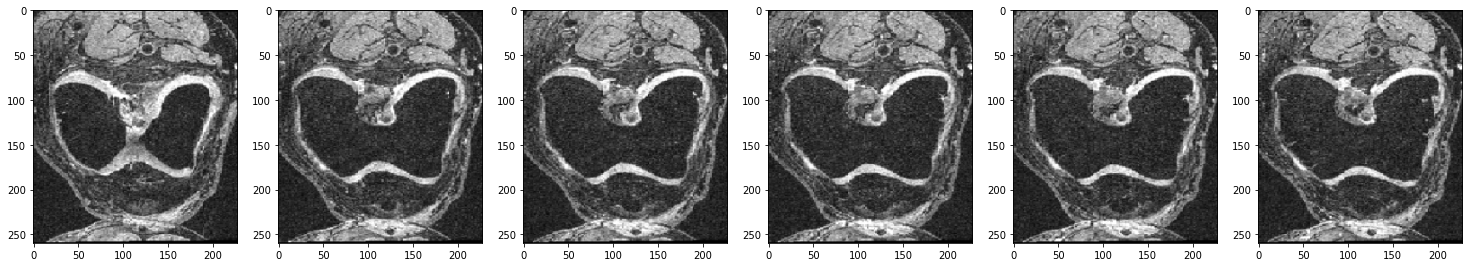

In [39]:
# Data Checking
## Check data and plot resized input images
fig = plt.figure(figsize=(30,10))
nplot = 7
for count in range(1,nplot):
    ax = fig.add_subplot(1, nplot,count)
    ax.imshow(X_train[count])
plt.show()